In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

import warnings

from numpy.linalg import matrix_rank, inv

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.tools import add_constant

In [2]:
%matplotlib inline
np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

In [3]:
def pretty_print_linear(coefs, names=None, sort=False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [4]:
def plot_correlation(df, numerical_feature_columns, target, k):
    cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm, annot=True, cmap = 'viridis')

In [5]:
def plot_correlation(df, numerical_feature_columns, target, k):
    cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm, annot=True, cmap = 'viridis')

def fit_ols(x, y):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.summary()

In [6]:
def generate_vif(df, target):
    X_var = add_constant(df.loc[:, df.columns != target])
    return pd.Series(
        [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])],
        index=X_var.columns,
    )

In [7]:
def generate_x_y_numeric_target(df, target):
    numerical_feature_columns = list(df._get_numeric_data().columns)
    X = df.loc[:, df.columns != target].values
    Y = df.loc[:, df.columns == target].values
    return numerical_feature_columns, X, Y

In [8]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\inp_data.csv")

In [9]:
df

,x1,x2,x3,y
0,100,110,40,3.900
1,95,110,40,2.600
2,90,120,30,2.700
3,85,110,40,3.000
4,80,100,20,2.400
5,75,110,40,2.200
6,70,90,0,2.100
7,65,110,40,2.100
8,60,80,10,1.500
9,55,80,10,1.800


<Axes: >

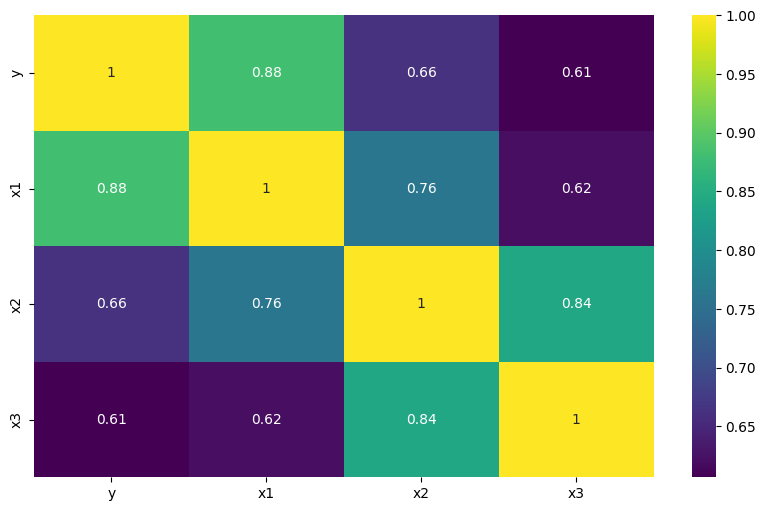

In [10]:
target = 'y'
numeric_cols, X, Y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

In [11]:
print(fit_ols(X,Y))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                    6.72e-07
Time:                        03:18:28   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
print (generate_vif(df, target))

const   135.872
x1        2.384
x2        5.028
x3        3.441
dtype: float64


In [13]:
df['x4'] = df['x1'] + df['x2'] + df['x3']

In [14]:
df

,x1,x2,x3,y,x4
0,100,110,40,3.900,250
1,95,110,40,2.600,245
2,90,120,30,2.700,240
3,85,110,40,3.000,235
4,80,100,20,2.400,200
5,75,110,40,2.200,225
6,70,90,0,2.100,160
7,65,110,40,2.100,215
8,60,80,10,1.500,150
9,55,80,10,1.800,145


<Axes: >

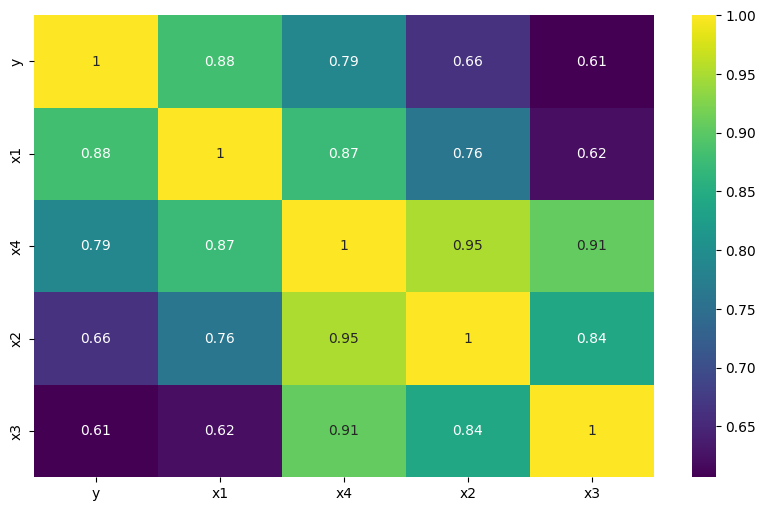

In [15]:
target = 'y'
numeric_cols, X, Y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

In [16]:
print(fit_ols(X,Y))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                    6.72e-07
Time:                        03:19:59   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
print (generate_vif(df, target))

const   135.872
x1          inf
x2          inf
x3          inf
x4          inf
dtype: float64


In [18]:
covariance_matrix = np.dot(X.T, X)
print (covariance_matrix)

[[ 62125  80500  22250 164875]
 [ 80500 105800  29200 215500]
 [ 22250  29200   9500  60950]
 [164875 215500  60950 441325]]


In [19]:
matrix_rank(covariance_matrix)

3

In [21]:
#inverse_covariance_matrix = inv(covariance_matrix)

In [22]:
X_sliced = X[:, 0:2]
covariance_matrix = np.dot(X_sliced.T, X_sliced)
print (covariance_matrix)

[[ 62125  80500]
 [ 80500 105800]]


In [23]:
matrix_rank(covariance_matrix)

2

In [24]:
inverse_covariance_matrix = inv(covariance_matrix)

In [25]:
weights = np.dot(np.dot(inverse_covariance_matrix, X_sliced.T), Y)
print (weights)

[[ 0.0408]
 [-0.0071]]


In [26]:
print(fit_ols(X_sliced,Y))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              255.3
Date:                Fri, 04 Apr 2025   Prob (F-statistic):                    5.66e-08
Time:                        03:22:33   Log-Likelihood:                         -2.5469
No. Observations:                  10   AIC:                                      9.094
Df Residuals:                       8   BIC:                                      9.699
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------